In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
#Fonction permattant de calculer la somme des valeurs manquantes et afficher un diagramme en moustaches(boxplot)

def missng_values(df):

    total = df.isnull().sum()   # Calcul du total des valeurs manquantes
    percent = round(df.isnull().sum()/df.isnull().count()*100,2) # Calcul le pourcentage des valeurs 

    missing_data = pd.concat([total,percent],axis =1, keys=['Total','Ratio_of_NA(%)']) 
    type=pd.DataFrame(df[missing_data.index].dtypes, columns=['Types'])
    missing_data=pd.concat([missing_data,type],axis=1)
    missing_data=missing_data.sort_values('Total',ascending=False)
    missing_data.head(20)
    
    print( "le total des valeurs manquantes est", total.sum()) #Afficher la somme total des valeurs manquantes
    print( percent) #afficher le poucentage

    print(missing_data.head(20))
    print()
    print(set(missing_data['Types']))
    print()
    print("---Categorical columns---")
    
    print(missing_data[missing_data['Types']=="object"].index) # Colonnes ayant des variables qualitatives
    print()
    print("---Numerical columns----")
    print(missing_data[missing_data['Types'] !="object"].index)  # Colonnes ayant des variables quantitatives
   
    sns.set_style('whitegrid')
    
    plt.figure(figsize=(16,16)) #Réglage de la taille
    plt.title("Visualisation des valeurs manquantes") #titre 
    sns.heatmap(df.isnull(), cbar=False) #Affichage de la carte thermique

## Chargement des dataframes

In [147]:
data_customers= pd.read_csv('olist_customers_dataset.csv')

In [148]:
data_geolocalisation = pd.read_csv('olist_geolocation_dataset.csv')

In [149]:
data_order_items=pd.read_csv('olist_order_items_dataset.csv')

In [150]:
data_order_payments=pd.read_csv('olist_order_payments_dataset.csv')

In [151]:
data_order_reviews=pd.read_csv('olist_order_reviews_dataset.csv')

In [152]:
data_orders=pd.read_csv('olist_orders_dataset.csv')

In [153]:
data_products=pd.read_csv('olist_products_dataset.csv')

In [154]:
data_sellers=pd.read_csv('olist_sellers_dataset.csv')

In [155]:
data_product_category=pd.read_csv('product_category_name_translation.csv')

## Exporation 

**data_customers**

In [156]:
data_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [157]:
data_customers.shape

(99441, 5)

le total des valeurs manquantes est 0
customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64
                          Total  Ratio_of_NA(%)   Types
customer_id                   0             0.0  object
customer_unique_id            0             0.0  object
customer_zip_code_prefix      0             0.0   int64
customer_city                 0             0.0  object
customer_state                0             0.0  object

{dtype('O'), dtype('int64')}

---Categorical columns---
Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state'], dtype='object')

---Numerical columns----
Index(['customer_zip_code_prefix'], dtype='object')


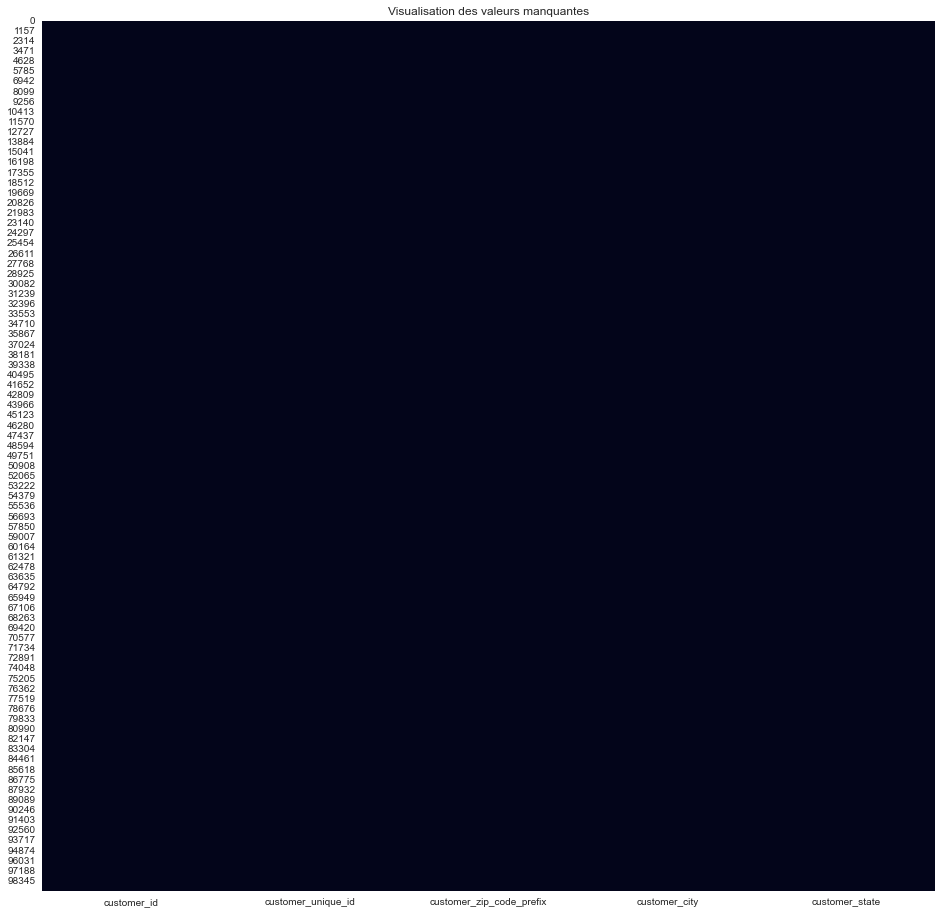

In [158]:
#Valeurs manquantes
missng_values(data_customers)

Il n'y a pas de valeurs manquantes

In [159]:
#Nombre de doublons
int(len(data_customers[data_customers.duplicated()]))

0

Il n'y a pas de doublons

In [160]:
# Les colonnes float64 et int64 sont séléctionnés
num_columns = list(data_customers.select_dtypes(include=['float64', 'int64']).columns)
print("Les variables quantitatives sont les suivantes : \n")
for num in num_columns :
    print(num)

Les variables quantitatives sont les suivantes : 

customer_zip_code_prefix


In [161]:
# Les colonnes object dtypes sont séléctionnés
obj_columns = list(data_customers.select_dtypes(include=['object', 'bool']).columns)
print("Les variables qualitatives sont les suivantes : \n")
for categ in obj_columns :
    print(categ, ":", data_customers[categ].nunique())

Les variables qualitatives sont les suivantes : 

customer_id : 99441
customer_unique_id : 96096
customer_city : 4119
customer_state : 27


In [162]:
data_customers.min()

customer_id                 00012a2ce6f8dcda20d059ce98491703
customer_unique_id          0000366f3b9a7992bf8c76cfdf3221e2
customer_zip_code_prefix                                1003
customer_city                            abadia dos dourados
customer_state                                            AC
dtype: object

**data_geolocalisation**

In [163]:
data_geolocalisation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [164]:
data_geolocalisation.shape

(1000163, 5)

le total des valeurs manquantes est 0
geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64
                             Total  Ratio_of_NA(%)    Types
geolocation_zip_code_prefix      0             0.0    int64
geolocation_lat                  0             0.0  float64
geolocation_lng                  0             0.0  float64
geolocation_city                 0             0.0   object
geolocation_state                0             0.0   object

{dtype('float64'), dtype('O'), dtype('int64')}

---Categorical columns---
Index(['geolocation_city', 'geolocation_state'], dtype='object')

---Numerical columns----
Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng'], dtype='object')


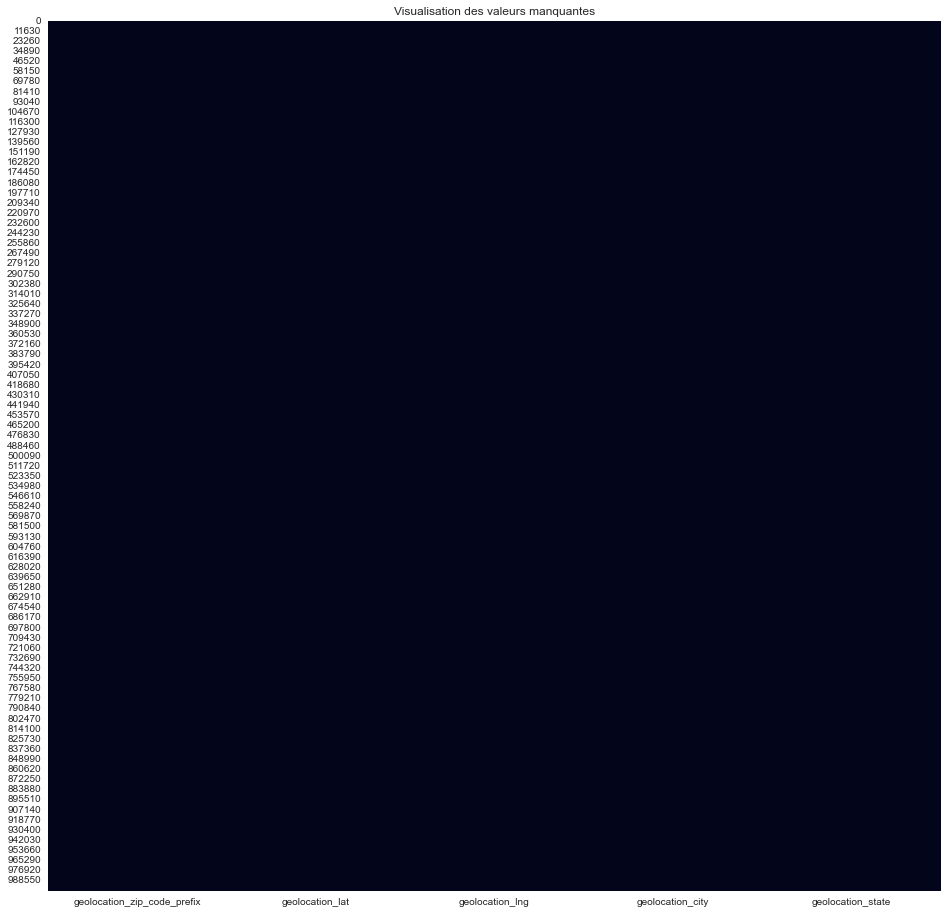

In [165]:
#Valeurs manquantes
missng_values(data_geolocalisation)

Il n'y a pas de valeurs manquantes

In [166]:
#Nombre de doublons
int(len(data_geolocalisation[data_geolocalisation.duplicated()]))

261831

In [167]:
# Les colonnes float64 et int64 sont séléctionnés
num_columns = list(data_geolocalisation.select_dtypes(include=['float64', 'int64']).columns)
print("Les variables quantitatives sont les suivantes : \n")
for num in num_columns :
    print(num)

Les variables quantitatives sont les suivantes : 

geolocation_zip_code_prefix
geolocation_lat
geolocation_lng


In [168]:
# Les colonnes object dtypes sont séléctionnés
obj_columns = list(data_geolocalisation.select_dtypes(include=['object', 'bool']).columns)
print("Les variables qualitatives sont les suivantes : \n")
for categ in obj_columns :
    print(categ, ":", data_geolocalisation[categ].nunique())

Les variables qualitatives sont les suivantes : 

geolocation_city : 8011
geolocation_state : 27


In [169]:
data_geolocalisation.describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [170]:
data_geolocalisation.geolocation_zip_code_prefix.nunique()

19015

In [171]:
print(f'Nombre de villes différentes :{data_geolocalisation.geolocation_city.nunique()}')

Nombre de villes différentes :8011


In [172]:
print(f'Nombre d\'état (state) différents :{data_geolocalisation.geolocation_state.nunique()}')

Nombre d'état (state) différents :27


In [173]:
data_geolocalisation[data_geolocalisation.duplicated()].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP


**data_order_items**

In [174]:
data_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [175]:
data_order_items.shape

(112650, 7)

le total des valeurs manquantes est 0
order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64
                     Total  Ratio_of_NA(%)    Types
order_id                 0             0.0   object
order_item_id            0             0.0    int64
product_id               0             0.0   object
seller_id                0             0.0   object
shipping_limit_date      0             0.0   object
price                    0             0.0  float64
freight_value            0             0.0  float64

{dtype('float64'), dtype('O'), dtype('int64')}

---Categorical columns---
Index(['order_id', 'product_id', 'seller_id', 'shipping_limit_date'], dtype='object')

---Numerical columns----
Index(['order_item_id', 'price', 'freight_value'], dtype='object')


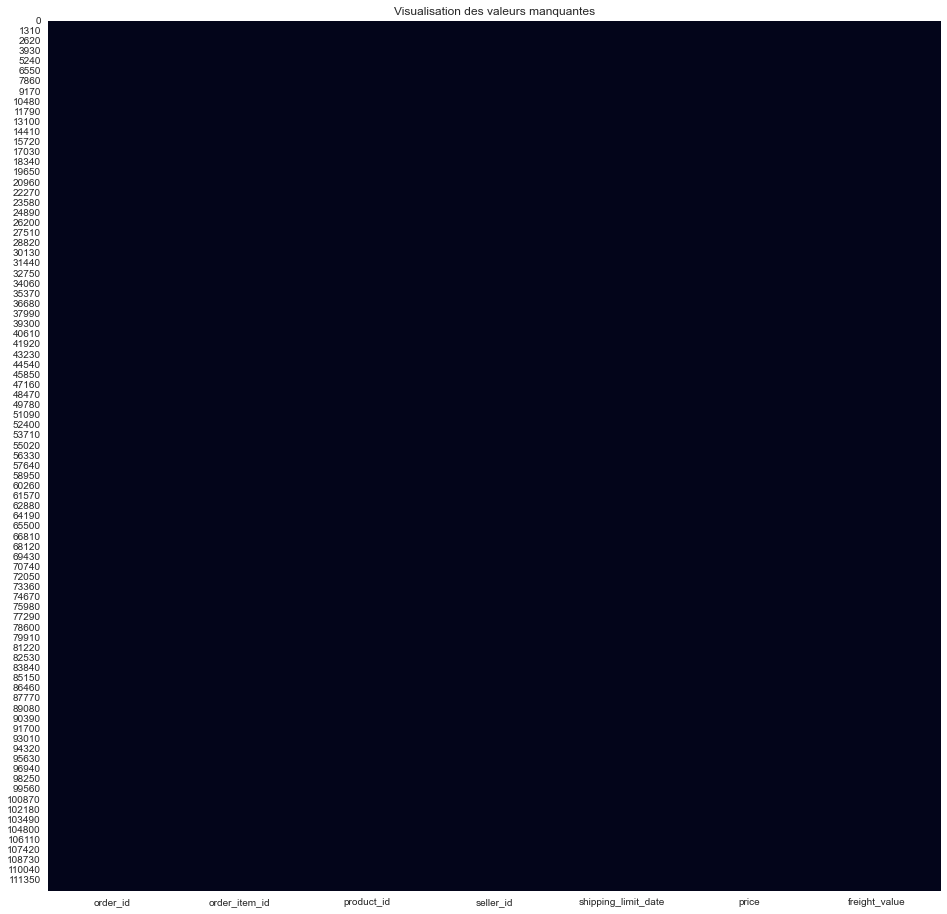

In [176]:
#Valeurs manquantes
missng_values(data_order_items)

Il n'y a pas de valeurs manquantes

In [177]:
#Nombre de doublons
int(len(data_order_items[data_order_items.duplicated()]))

0

Il n'y a pas de doublons

In [178]:
# Les colonnes float64 et int64 sont séléctionnés
num_columns = list(data_order_items.select_dtypes(include=['float64', 'int64']).columns)
print("Les variables quantitatives sont les suivantes : \n")
for num in num_columns :
    print(num)

Les variables quantitatives sont les suivantes : 

order_item_id
price
freight_value


In [179]:
# Les colonnes object dtypes sont séléctionnés
obj_columns = list(data_order_items.select_dtypes(include=['object', 'bool']).columns)
print("Les variables qualitatives sont les suivantes : \n")
for categ in obj_columns :
    print(categ, ":", data_order_items[categ].nunique())

Les variables qualitatives sont les suivantes : 

order_id : 98666
product_id : 32951
seller_id : 3095
shipping_limit_date : 93318


In [180]:
data_order_items.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [181]:
data_order_items.order_item_id.nunique()

21

In [182]:
data_order_items.order_item_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21], dtype=int64)

**data_order_payments**

In [183]:
data_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [184]:
data_order_payments.shape

(103886, 5)

le total des valeurs manquantes est 0
order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64
                      Total  Ratio_of_NA(%)    Types
order_id                  0             0.0   object
payment_sequential        0             0.0    int64
payment_type              0             0.0   object
payment_installments      0             0.0    int64
payment_value             0             0.0  float64

{dtype('float64'), dtype('O'), dtype('int64')}

---Categorical columns---
Index(['order_id', 'payment_type'], dtype='object')

---Numerical columns----
Index(['payment_sequential', 'payment_installments', 'payment_value'], dtype='object')


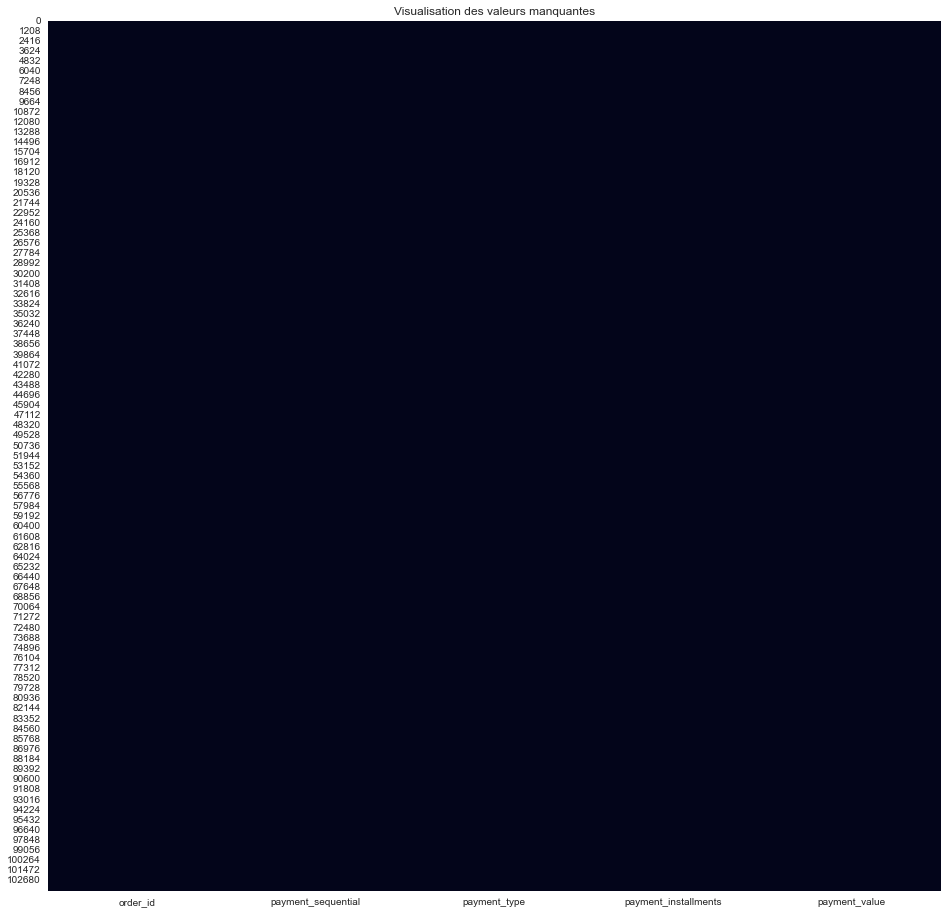

In [185]:
#Valeurs manquantes
missng_values(data_order_payments)

Il n'y a pas de valeurs manquantes

In [186]:
#Nombre de doublons
int(len(data_order_payments[data_order_payments.duplicated()]))

0

Il n'y a pas de doublons

In [187]:
# Les colonnes float64 et int64 sont séléctionnés
num_columns = list(data_order_payments.select_dtypes(include=['float64', 'int64']).columns)
print("Les variables quantitatives sont les suivantes : \n")
for num in num_columns :
    print(num)

Les variables quantitatives sont les suivantes : 

payment_sequential
payment_installments
payment_value


In [188]:
# Les colonnes object dtypes sont séléctionnés
obj_columns = list(data_order_payments.select_dtypes(include=['object', 'bool']).columns)
print("Les variables qualitatives sont les suivantes : \n")
for categ in obj_columns :
    print(categ, ":", data_order_payments[categ].nunique())

Les variables qualitatives sont les suivantes : 

order_id : 99440
payment_type : 5


In [189]:
data_order_payments.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [190]:
data_order_payments.payment_sequential.nunique()

29

In [191]:
data_order_payments.payment_sequential.unique()

array([ 1,  2,  4,  5,  3,  8,  6,  7, 10, 11, 17, 19, 27, 12,  9, 15, 13,
       14, 16, 25, 22, 26, 29, 28, 18, 21, 24, 23, 20], dtype=int64)

In [192]:
data_order_payments.payment_type.nunique()

5

In [193]:
data_order_payments.payment_type.unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [194]:
data_order_payments.payment_installments.nunique()

24

In [195]:
data_order_payments.payment_installments.unique()

array([ 8,  1,  2,  3,  6,  5,  4, 10,  7, 12,  9, 13, 15, 24, 11, 18, 14,
       20, 21, 17, 22,  0, 16, 23], dtype=int64)

**data_order_reviews**

In [196]:
data_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [197]:
data_order_reviews.shape

(99224, 7)

le total des valeurs manquantes est 145903
review_id                   0.00
order_id                    0.00
review_score                0.00
review_comment_title       88.34
review_comment_message     58.70
review_creation_date        0.00
review_answer_timestamp     0.00
dtype: float64
                         Total  Ratio_of_NA(%)   Types
review_comment_title     87656           88.34  object
review_comment_message   58247           58.70  object
review_id                    0            0.00  object
order_id                     0            0.00  object
review_score                 0            0.00   int64
review_creation_date         0            0.00  object
review_answer_timestamp      0            0.00  object

{dtype('O'), dtype('int64')}

---Categorical columns---
Index(['review_comment_title', 'review_comment_message', 'review_id',
       'order_id', 'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

---Numerical columns----
Index(['review_score'], d

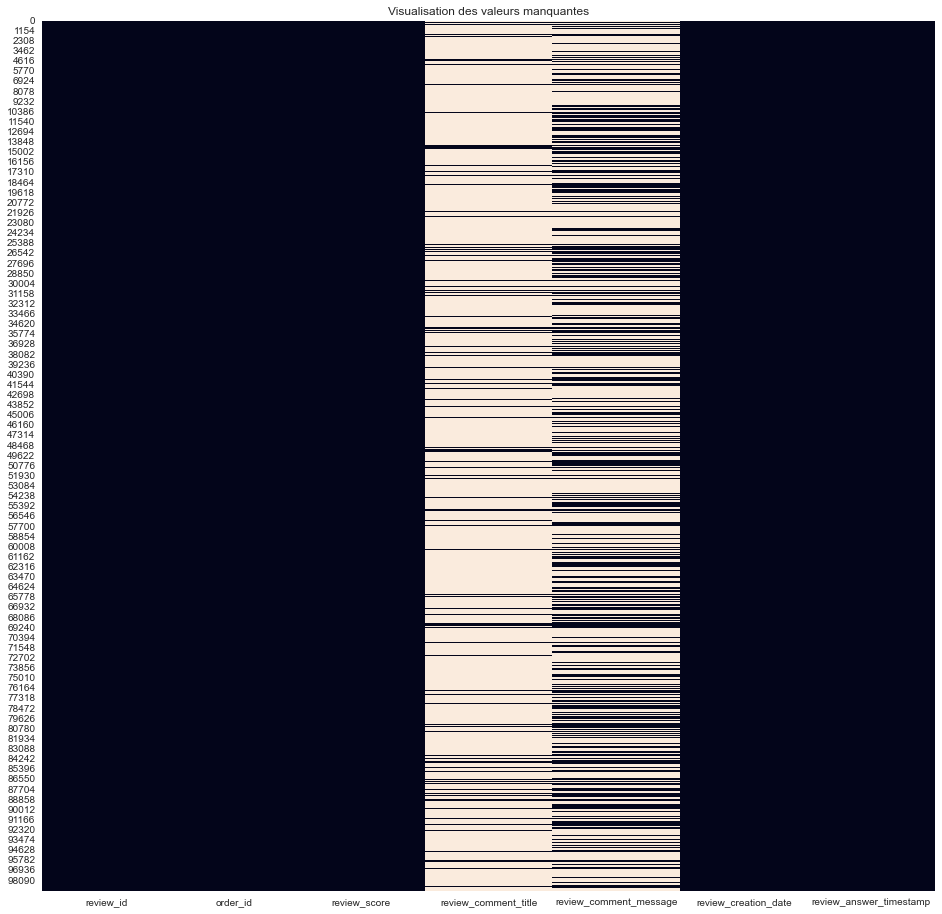

In [198]:
#Valeurs manquantes
missng_values(data_order_reviews)

In [199]:
#Nombre de doublons
int(len(data_order_reviews[data_order_reviews.duplicated()]))

0

Il n'y a pas de doublons

In [200]:
# Les colonnes float64 et int64 sont séléctionnés
num_columns = list(data_order_reviews.select_dtypes(include=['float64', 'int64']).columns)
print("Les variables quantitatives sont les suivantes : \n")
for num in num_columns :
    print(num)

Les variables quantitatives sont les suivantes : 

review_score


In [201]:
# Les colonnes object dtypes sont séléctionnés
obj_columns = list(data_order_reviews.select_dtypes(include=['object', 'bool']).columns)
print("Les variables qualitatives sont les suivantes : \n")
for categ in obj_columns :
    print(categ, ":", data_order_reviews[categ].nunique())

Les variables qualitatives sont les suivantes : 

review_id : 98410
order_id : 98673
review_comment_title : 4527
review_comment_message : 36159
review_creation_date : 636
review_answer_timestamp : 98248


In [202]:
data_order_reviews.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [203]:
data_order_reviews.review_score.unique()

array([4, 5, 1, 3, 2], dtype=int64)

In [204]:
data_order_reviews.review_comment_title.unique()

array([nan, 'recomendo', 'Super recomendo', ...,
       'Não foi entregue o pedido', 'OTIMA EMBALAGEM', 'Foto enganosa '],
      dtype=object)

In [205]:
data_order_reviews.review_answer_timestamp.min(), data_order_reviews.review_answer_timestamp.max()

('2016-10-07 18:32:28', '2018-10-29 12:27:35')

**data_orders**

In [206]:
data_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [207]:
data_orders.shape

(99441, 8)

le total des valeurs manquantes est 4908
order_id                         0.00
customer_id                      0.00
order_status                     0.00
order_purchase_timestamp         0.00
order_approved_at                0.16
order_delivered_carrier_date     1.79
order_delivered_customer_date    2.98
order_estimated_delivery_date    0.00
dtype: float64
                               Total  Ratio_of_NA(%)   Types
order_delivered_customer_date   2965            2.98  object
order_delivered_carrier_date    1783            1.79  object
order_approved_at                160            0.16  object
order_id                           0            0.00  object
customer_id                        0            0.00  object
order_status                       0            0.00  object
order_purchase_timestamp           0            0.00  object
order_estimated_delivery_date      0            0.00  object

{dtype('O')}

---Categorical columns---
Index(['order_delivered_customer_date', 'order_del

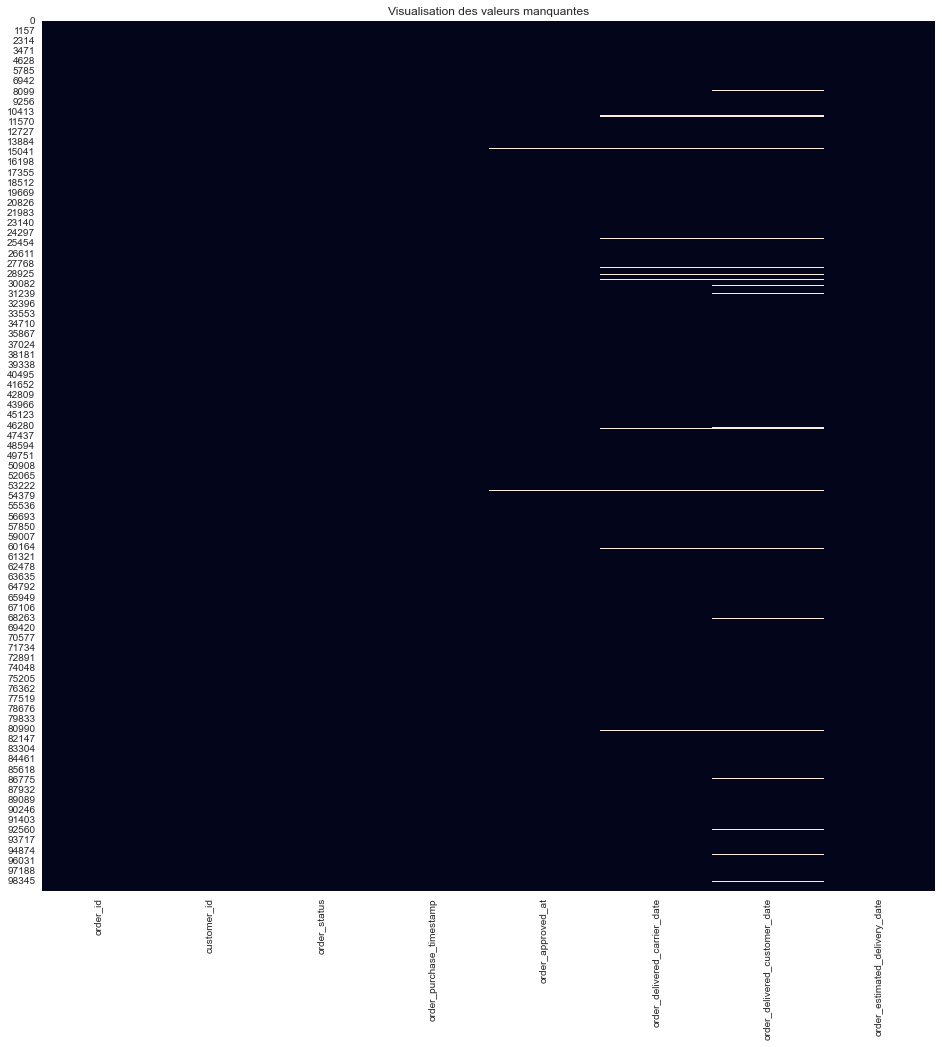

In [208]:
#Valeurs manquantes
missng_values(data_orders)

In [209]:
#Nombre de doublons
int(len(data_orders[data_orders.duplicated()]))

0

Il n'y a pas de doublons

In [210]:
# Les colonnes float64 et int64 sont séléctionnés
num_columns = list(data_orders.select_dtypes(include=['float64', 'int64']).columns)
print("Les variables quantitatives sont les suivantes : \n")
for num in num_columns :
    print(num)

Les variables quantitatives sont les suivantes : 



In [211]:
# Les colonnes object dtypes sont séléctionnés
obj_columns = list(data_orders.select_dtypes(include=['object', 'bool']).columns)
print("Les variables qualitatives sont les suivantes : \n")
for categ in obj_columns :
    print(categ, ":", data_orders[categ].nunique())

Les variables qualitatives sont les suivantes : 

order_id : 99441
customer_id : 99441
order_status : 8
order_purchase_timestamp : 98875
order_approved_at : 90733
order_delivered_carrier_date : 81018
order_delivered_customer_date : 95664
order_estimated_delivery_date : 459


In [212]:
data_orders.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [213]:
data_orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [214]:
data_orders.order_status.nunique()

8

**data_products**

In [215]:
data_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [216]:
data_products.shape

(32951, 9)

le total des valeurs manquantes est 2448
product_id                    0.00
product_category_name         1.85
product_name_lenght           1.85
product_description_lenght    1.85
product_photos_qty            1.85
product_weight_g              0.01
product_length_cm             0.01
product_height_cm             0.01
product_width_cm              0.01
dtype: float64
                            Total  Ratio_of_NA(%)    Types
product_category_name         610            1.85   object
product_name_lenght           610            1.85  float64
product_description_lenght    610            1.85  float64
product_photos_qty            610            1.85  float64
product_weight_g                2            0.01  float64
product_length_cm               2            0.01  float64
product_height_cm               2            0.01  float64
product_width_cm                2            0.01  float64
product_id                      0            0.00   object

{dtype('float64'), dtype('O')}

---Cat

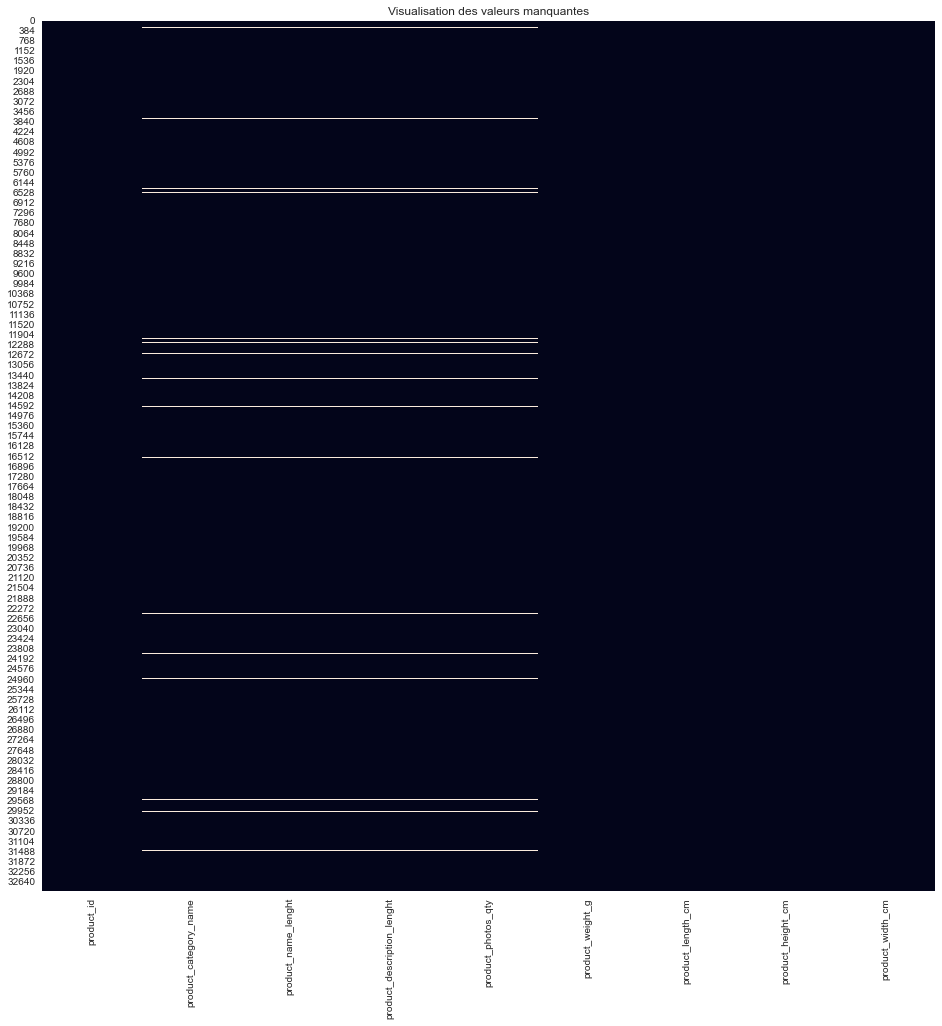

In [217]:
#Valeurs manquantes
missng_values(data_products)

In [218]:
#Nombre de doublons
int(len(data_products[data_products.duplicated()]))

0

Il n'y a pas de doublons

In [219]:
# Les colonnes float64 et int64 sont séléctionnés
num_columns = list(data_products.select_dtypes(include=['float64', 'int64']).columns)
print("Les variables quantitatives sont les suivantes : \n")
for num in num_columns :
    print(num)

Les variables quantitatives sont les suivantes : 

product_name_lenght
product_description_lenght
product_photos_qty
product_weight_g
product_length_cm
product_height_cm
product_width_cm


In [220]:
# Les colonnes object dtypes sont séléctionnés
obj_columns = list(data_products.select_dtypes(include=['object', 'bool']).columns)
print("Les variables qualitatives sont les suivantes : \n")
for categ in obj_columns :
    print(categ, ":", data_products[categ].nunique())

Les variables qualitatives sont les suivantes : 

product_id : 32951
product_category_name : 73


In [221]:
data_products.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


**data_sellers**

In [222]:
data_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [223]:
data_sellers.shape

(3095, 4)

le total des valeurs manquantes est 0
seller_id                 0.0
seller_zip_code_prefix    0.0
seller_city               0.0
seller_state              0.0
dtype: float64
                        Total  Ratio_of_NA(%)   Types
seller_id                   0             0.0  object
seller_zip_code_prefix      0             0.0   int64
seller_city                 0             0.0  object
seller_state                0             0.0  object

{dtype('O'), dtype('int64')}

---Categorical columns---
Index(['seller_id', 'seller_city', 'seller_state'], dtype='object')

---Numerical columns----
Index(['seller_zip_code_prefix'], dtype='object')


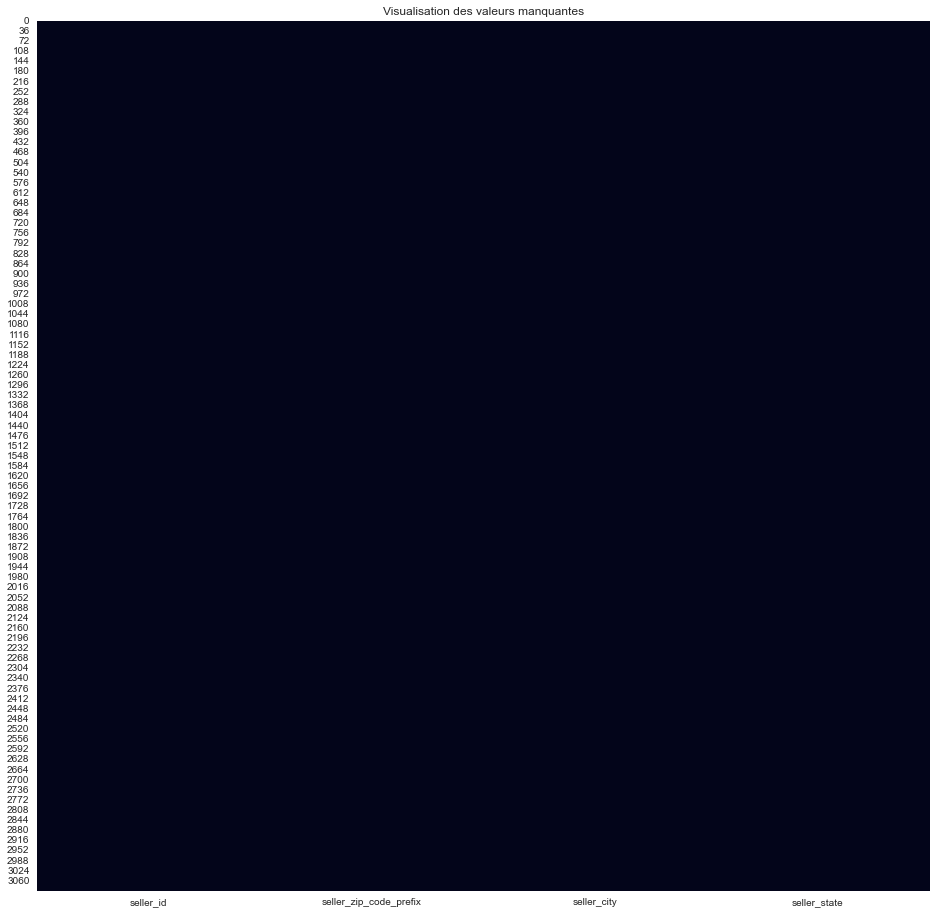

In [224]:
#Valeurs manquantes
missng_values(data_sellers)

In [225]:
#Nombre de doublons
int(len(data_sellers[data_sellers.duplicated()]))

0

Il n'y a pas de doublons

In [226]:
# Les colonnes float64 et int64 sont séléctionnés
num_columns = list(data_sellers.select_dtypes(include=['float64', 'int64']).columns)
print("Les variables quantitatives sont les suivantes : \n")
for num in num_columns :
    print(num)

Les variables quantitatives sont les suivantes : 

seller_zip_code_prefix


In [227]:
# Les colonnes object dtypes sont séléctionnés
obj_columns = list(data_sellers.select_dtypes(include=['object', 'bool']).columns)
print("Les variables qualitatives sont les suivantes : \n")
for categ in obj_columns :
    print(categ, ":", data_sellers[categ].nunique())

Les variables qualitatives sont les suivantes : 

seller_id : 3095
seller_city : 611
seller_state : 23


In [228]:
data_sellers.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


**data_product_category**

In [229]:
data_product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [230]:
data_product_category.shape

(71, 2)

le total des valeurs manquantes est 0
product_category_name            0.0
product_category_name_english    0.0
dtype: float64
                               Total  Ratio_of_NA(%)   Types
product_category_name              0             0.0  object
product_category_name_english      0             0.0  object

{dtype('O')}

---Categorical columns---
Index(['product_category_name', 'product_category_name_english'], dtype='object')

---Numerical columns----
Index([], dtype='object')


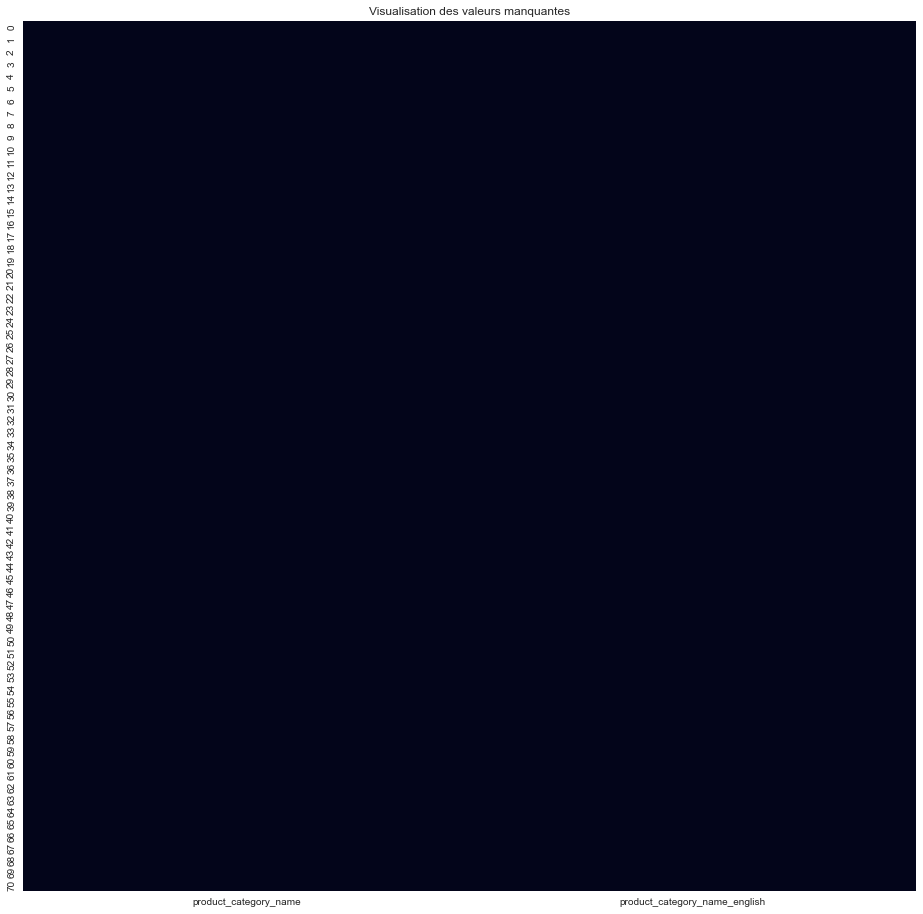

In [231]:
#Valeurs manquantes
missng_values(data_product_category)

In [232]:
#Nombre de doublons
int(len(data_product_category[data_product_category.duplicated()]))

0

Il n'y a pas de doublons

In [233]:
# Les colonnes float64 et int64 sont séléctionnés
num_columns = list(data_product_category.select_dtypes(include=['float64', 'int64']).columns)
print("Les variables quantitatives sont les suivantes : \n")
for num in num_columns :
    print(num)

Les variables quantitatives sont les suivantes : 



In [234]:
# Les colonnes object dtypes sont séléctionnés
obj_columns = list(data_product_category.select_dtypes(include=['object', 'bool']).columns)
print("Les variables qualitatives sont les suivantes : \n")
for categ in obj_columns :
    print(categ, ":", data_product_category[categ].nunique())

Les variables qualitatives sont les suivantes : 

product_category_name : 71
product_category_name_english : 71


In [235]:
data_product_category.describe(include='all')

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


## Nettoyage des données

**Suppression des doublons**

In [236]:
N_initial_lines_geolocalisation = data_geolocalisation.copy().shape[0]
N_initial_lines_geolocalisation

1000163

In [237]:
data_geolocalisation.drop_duplicates(inplace=True)

In [238]:
#Nombre de doublons après nettoyage
len(data_geolocalisation[data_geolocalisation.duplicated()])

0

In [239]:
N_final_lines_geolocalisation = data_geolocalisation.shape[0]
N_final_lines_geolocalisation

738332

In [240]:
#Pourcentage de lignes supprimées 
N = ((N_initial_lines_geolocalisation - N_final_lines_geolocalisation)/N_initial_lines_geolocalisation)*100 
print(N,'%')

26.17883285024541 %


**Merge des Dataframes**

In [241]:
# 1) Merge data_customers & data_orders sur la clé customer_id
data = pd.merge(data_customers,data_orders, on='customer_id', how='inner')

# 2) Merge data & data_order_reviews sur la clé "order_id"
data = pd.merge(data, data_order_reviews, on='order_id', how='inner')

# 3) Merge data & data_order_payments sur la clé order_id
data = pd.merge(data, data_order_payments, on='order_id', how='inner')

# 4) Merge data & de data_order_items sur la clé order_id
data = pd.merge(data, data_order_items, on='order_id', how='inner')

# 5) Merge data & data_products sur la clé product_id
data = pd.merge(data, data_products, on='product_id', how='inner')

# 6) Merge data & data_sellers sur la clé seller_id
data = pd.merge(data, data_sellers, on='seller_id', how='inner')

# 7) Merge data & data_product_category sur la clé product_category_name
data = pd.merge(data, data_product_category, on='product_category_name', how='inner')

# We are not going to use geolocation data 
# We are going to use city names instead

In [242]:
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture


In [243]:
data.shape

(115609, 40)

le total des valeurs manquantes est 172124
customer_id                       0.00
customer_unique_id                0.00
customer_zip_code_prefix          0.00
customer_city                     0.00
customer_state                    0.00
order_id                          0.00
order_status                      0.00
order_purchase_timestamp          0.00
order_approved_at                 0.01
order_delivered_carrier_date      1.03
order_delivered_customer_date     2.08
order_estimated_delivery_date     0.00
review_id                         0.00
review_score                      0.00
review_comment_title             88.06
review_comment_message           57.70
review_creation_date              0.00
review_answer_timestamp           0.00
payment_sequential                0.00
payment_type                      0.00
payment_installments              0.00
payment_value                     0.00
order_item_id                     0.00
product_id                        0.00
seller_id            

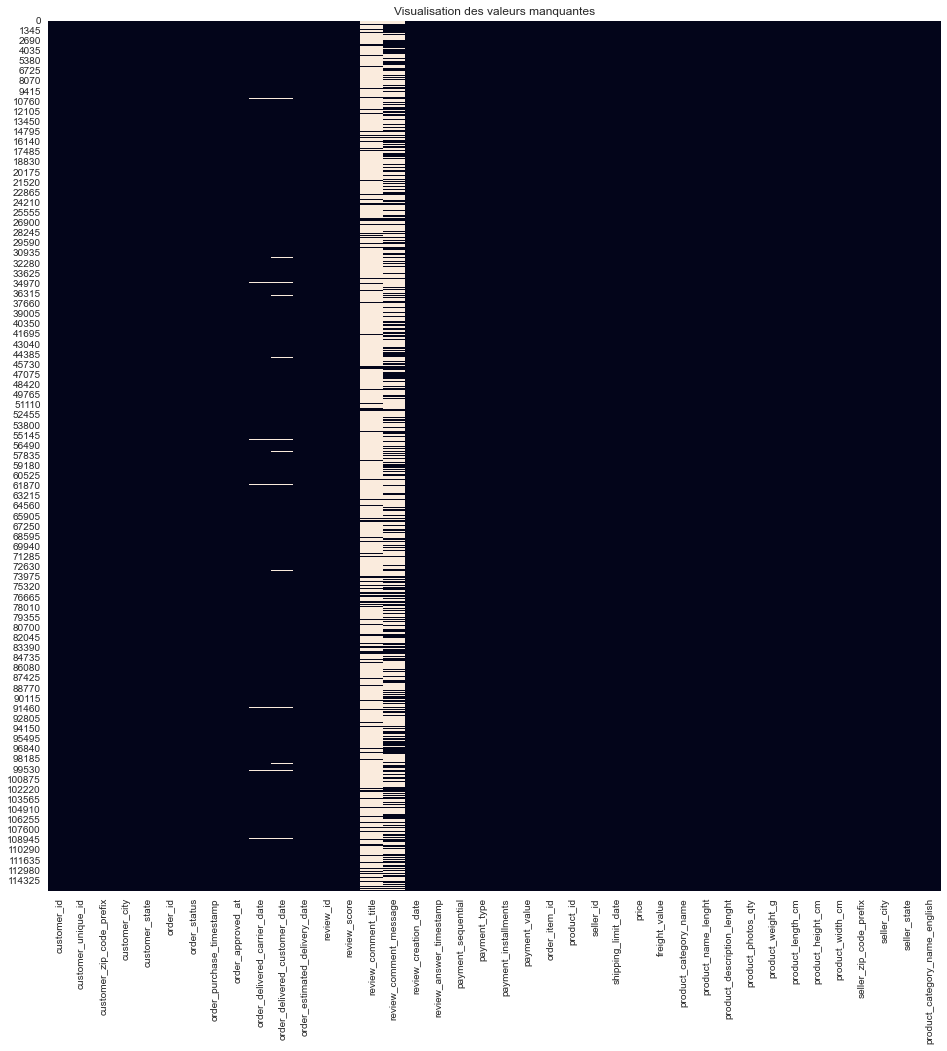

In [244]:
#Valeurs manquantes
missng_values(data)

In [245]:
#Nombre de doublons
int(len(data[data.duplicated()]))

0

Il n'y a pas de doublons

In [246]:
# Les colonnes float64 et int64 sont séléctionnés
num_columns = list(data.select_dtypes(include=['float64', 'int64']).columns)
print("Les variables quantitatives sont les suivantes : \n")
for num in num_columns :
    print(num)

Les variables quantitatives sont les suivantes : 

customer_zip_code_prefix
review_score
payment_sequential
payment_installments
payment_value
order_item_id
price
freight_value
product_name_lenght
product_description_lenght
product_photos_qty
product_weight_g
product_length_cm
product_height_cm
product_width_cm
seller_zip_code_prefix


In [247]:
# Les colonnes object dtypes sont séléctionnés
obj_columns = list(data.select_dtypes(include=['object', 'bool']).columns)
print("Les variables qualitatives sont les suivantes : \n")
for categ in obj_columns :
    print(categ, ":", data[categ].nunique())

Les variables qualitatives sont les suivantes : 

customer_id : 96516
customer_unique_id : 93396
customer_city : 4093
customer_state : 27
order_id : 96516
order_status : 7
order_purchase_timestamp : 95989
order_approved_at : 88332
order_delivered_carrier_date : 79241
order_delivered_customer_date : 93702
order_estimated_delivery_date : 449
review_id : 96319
review_comment_title : 4477
review_comment_message : 35176
review_creation_date : 632
review_answer_timestamp : 96163
payment_type : 4
product_id : 32171
seller_id : 3028
shipping_limit_date : 91386
product_category_name : 71
seller_city : 604
seller_state : 23
product_category_name_english : 71


## Regroupement des catégories

**Regroupement des catégories de produits**

In [248]:
list_product_category = data_product_category.product_category_name_english.to_list()

In [249]:
len(list_product_category)

71

In [250]:
list_product_category

['health_beauty',
 'computers_accessories',
 'auto',
 'bed_bath_table',
 'furniture_decor',
 'sports_leisure',
 'perfumery',
 'housewares',
 'telephony',
 'watches_gifts',
 'food_drink',
 'baby',
 'stationery',
 'tablets_printing_image',
 'toys',
 'fixed_telephony',
 'garden_tools',
 'fashion_bags_accessories',
 'small_appliances',
 'consoles_games',
 'audio',
 'fashion_shoes',
 'cool_stuff',
 'luggage_accessories',
 'air_conditioning',
 'construction_tools_construction',
 'kitchen_dining_laundry_garden_furniture',
 'costruction_tools_garden',
 'fashion_male_clothing',
 'pet_shop',
 'office_furniture',
 'market_place',
 'electronics',
 'home_appliances',
 'party_supplies',
 'home_confort',
 'costruction_tools_tools',
 'agro_industry_and_commerce',
 'furniture_mattress_and_upholstery',
 'books_technical',
 'home_construction',
 'musical_instruments',
 'furniture_living_room',
 'construction_tools_lights',
 'industry_commerce_and_business',
 'food',
 'art',
 'furniture_bedroom',
 'books_

In [251]:
new_product_categories = {
 
# health & beauty
 'health_beauty':"health_beauty",
 'perfumery':"health_beauty",

# computers & electronics
 'computers_accessories':"computers_electronics",
 'telephony':"computers_electronics",
 'watches_gifts':"computers_electronics",
 'tablets_printing_image':"computers_electronics",
 'fixed_telephony':"computers_electronics",
 'consoles_games':"computers_electronics",
 'audio':"computers_electronics",
 'electronics':"computers_electronics",
 'small_appliances':"computers_electronics",
 'computers':"computers_electronics",
    
# auto   
 'auto':"auto",
 
# home   
 'bed_bath_table':"home",
 'furniture_decor':"home",
 'housewares':"home",
 'air_conditioning':"home",
 'furniture_mattress_and_upholstery':"home",
 'furniture_living_room':"home",
 'kitchen_dining_laundry_garden_furniture':"home",
 'home_appliances':"home",
 'home_confort':"home",
 'furniture_bedroom':"home", 
 'la_cuisine':"home",
 'home_appliances_2':"home", 
 'home_comfort_2':"home",
 'small_appliances_home_oven_and_coffee':"home",

      
# food & drink
 'food_drink':"food_drink",
 'drinks':"food_drink",
 'food':"food_drink",
    
# Children   
 'baby':"children",
 'toys':"children",  
 'fashion_childrens_clothes':"children",
 'diapers_and_hygiene':"children",
    
    

# pet & garden
 'garden_tools':"pet_garden",
 'costruction_tools_garden':"pet_garden",
 'flowers':"pet_garden",
 'pet_shop':"pet_garden",
 
# fashion
 'fashion_shoes':"fashion",
 'luggage_accessories':"fashion",
 'fashion_bags_accessories':"fashion", 
 'fashion_male_clothing':"fashion",
 'fashion_underwear_beach':"fashion",
 'fashion_sport':"fashion",
 'fashio_female_clothing':"fashion",
 
# construction    
 'construction_tools_construction':"construction",
 'costruction_tools_tools':"construction",
 'home_construction':"construction",
 'construction_tools_lights':"construction",
 'construction_tools_safety':"construction",


# party
 'party_supplies':"party",
 'christmas_supplies':"party",

# office
 'stationery':"office",
 'office_furniture':"office",
 'agro_industry_and_commerce':"office",
 'industry_commerce_and_business':"office",
 'signaling_and_security':"office",
 'security_and_services':"office",
    
# culture & entertainment
  'art':"culture_entertainment",
 'books_technical':"culture_entertainment",
 'books_general_interest':"culture_entertainment",
 'books_imported':"culture_entertainment",
 'cine_photo':"culture_entertainment",
 'music':"culture_entertainment", 
 'cds_dvds_musicals':"culture_entertainment",
 'dvds_blu_ray':"culture_entertainment",
 'musical_instruments':"culture_entertainment", 
 'sports_leisure':"culture_entertainment",
 'arts_and_craftmanship':"culture_entertainment",
 
# other   
 'cool_stuff':"other",
 'market_place':"other",
}

In [252]:
data['product_category_name_english'] = data['product_category_name_english'].replace(new_product_categories)

**Regroupement des états en régions**

In [253]:
# On va regrouper les états en régions selon le découpage officiel proposé par Institut Brésilien de Géographie et de Statistiques
# Central-West, Northeast, North, Southeast, South
dict_regions = {
    
    "DF": "central_west",
    "GO": "central_west",
    "MS": "central_west",
    "MT": "central_west",
    
    "AL": "north_east",
    "BA": "north_east",
    "CE": "north_east",
    "MA": "north_east",
    "PE": "north_east",
    "PB": "north_east",
    "PI": "north_east",
    "RN": "north_east",
    "SE": "north_east",
    
    
    "AC": "north", 
    "AM": "north",
    "AP": "north",
    "PA": "north",
    "RO": "north",
    "RR": "north",
    "TO": "north",
    
    "ES": "south_east",
    "MG": "south_east",
    "RJ": "south_east",
    "SP": "south_east",
    
    "PR": "south",
    "RS": "south",
    "SC": "south",
    
}

# Remplacement des noms d'états par leur région respective
data['customer_state'] = data['customer_state'].replace(dict_regions)
data['seller_state'] = data['seller_state'].replace(dict_regions)

# Modification des noms de colonnes
data.rename(columns={'customer_state':'region'},inplace=True)
data.rename(columns={'seller_state':'seller_region'},inplace=True)

**Suppression des colonnes inutiles**

In [254]:
# regroupement des noms de colonnes à supprimer dans une liste
columns_to_drop =['customer_id','review_comment_title','review_creation_date','review_answer_timestamp',
                  'review_comment_message','product_category_name','product_name_lenght','product_description_lenght',
                  'product_weight_g','product_width_cm','product_length_cm','product_height_cm','seller_zip_code_prefix'
                 ]
# Suppression des colonnes appartenant à liste
data= data.drop(columns_to_drop, axis=1)

**Correction nom des colonnes**

In [255]:
# création d'un dictionnaire avec la modification des noms de colonnes
columns = {
'customer_zip_code_prefix':'zip_code_prefix',
'customer_city':'city',
'customer_state':'state',
'product_category_name_english':'product_category_name'}

# modification des noms de colonnes
data = data.rename(columns=columns)

**Suppression des données manquantes**

In [256]:
data.isna().sum()

customer_unique_id                  0
zip_code_prefix                     0
city                                0
region                              0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1195
order_delivered_customer_date    2400
order_estimated_delivery_date       0
review_id                           0
review_score                        0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_photos_qty                  0
seller_city                         0
seller_region                       0
product_cate

In [257]:
N_initial_lines=len(data)

In [258]:
N_initial_lines

115609

In [259]:
data=data.dropna()

In [260]:
N_final_lines=len(data)

In [261]:
N_final_lines

113194

In [262]:
# Pourcentage de lignes supprimées
N = ((N_initial_lines - N_final_lines)/N_initial_lines)*100
print(N,'%')

2.0889377124618327 %


In [263]:
# Vérification du nombre de colonnes avec données manquantes après nettoyage
data.isna().sum()

customer_unique_id               0
zip_code_prefix                  0
city                             0
region                           0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
review_id                        0
review_score                     0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_photos_qty               0
seller_city                      0
seller_region                    0
product_category_name            0
dtype: int64

## Feature Engineering

**Nombre de commandes par client**

In [264]:
nb_order = pd.DataFrame(data.groupby(["customer_unique_id"])["order_id"].nunique())

nb_order.rename(columns={"order_id": "nb_order"}, inplace=True)

data = pd.merge(data,nb_order, on='customer_unique_id', how='inner')

**Nombre de produits par client**

In [265]:
nb_product = pd.DataFrame(data.groupby('customer_unique_id')['product_id'].count())
nb_product.rename(columns={'product_id':'nb_product' }, inplace=True)

data = pd.merge(data,nb_product, on='customer_unique_id', how='inner')

In [266]:
data.head()

,customer_unique_id,zip_code_prefix,city,region,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,seller_id,shipping_limit_date,price,freight_value,product_photos_qty,seller_city,seller_region,product_category_name,nb_order,nb_product
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,south_east,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,...,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1.0,itaquaquecetuba,south_east,office,1,1
1,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,north,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,1.0,itaquaquecetuba,south_east,office,1,2
2,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,north,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,1.0,itaquaquecetuba,south_east,office,1,2
3,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,south,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,...,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,1.0,itaquaquecetuba,south_east,office,1,1
4,23397e992b09769faf5e66f9e171a241,25931,mage,south_east,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,...,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,1.0,itaquaquecetuba,south_east,office,1,1


In [267]:
data.nb_order.value_counts()

1     105267
2       6859
3        752
4        175
5         57
7         31
6         25
9         14
14        14
Name: nb_order, dtype: int64

**Catégorie la plus achetée**

In [268]:
best_category = pd.DataFrame(data.sort_values(
        ['customer_unique_id','product_category_name'], ascending=False).groupby(
        ['customer_unique_id','product_category_name']).head(1)[[
        'customer_unique_id', 'product_category_name']])

best_category.set_index('customer_unique_id', inplace=True)
best_category.columns = ['best_category']

data = pd.merge(data,best_category, on='customer_unique_id', how='inner')

In [269]:
best_category

,best_category
customer_unique_id,
ffffd2657e2aad2907e67c3e9daecbeb,health_beauty
ffff5962728ec6157033ef9805bacc48,computers_electronics
ffff371b4d645b6ecea244b27531430a,auto
fffea47cd6d3cc0a88bd621562a9d061,children
fffcf5a5ff07b0908bd4e2dbc735a684,health_beauty
...,...
0004aac84e0df4da2b147fca70cf8255,computers_electronics
0000f6ccb0745a6a4b88665a16c9f078,computers_electronics
0000f46a3911fa3c0805444483337064,office


In [270]:
data.head()

,customer_unique_id,zip_code_prefix,city,region,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,shipping_limit_date,price,freight_value,product_photos_qty,seller_city,seller_region,product_category_name,nb_order,nb_product,best_category
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,south_east,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,...,2017-05-22 15:22:12,124.99,21.88,1.0,itaquaquecetuba,south_east,office,1,1,office
1,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,north,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,2017-11-23 00:47:18,112.99,24.90,1.0,itaquaquecetuba,south_east,office,1,2,office
2,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,north,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,2017-11-23 00:47:18,112.99,24.90,1.0,itaquaquecetuba,south_east,office,1,2,office
3,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,south,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,...,2017-05-22 22:22:56,124.99,15.62,1.0,itaquaquecetuba,south_east,office,1,1,office
4,23397e992b09769faf5e66f9e171a241,25931,mage,south_east,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,...,2018-02-18 21:29:19,106.99,30.59,1.0,itaquaquecetuba,south_east,office,1,1,office


**Montant total des achats par client**

In [271]:
# Montant total des achats par client
orders_tot_amount =pd.DataFrame(data.groupby(['customer_unique_id'])['price'].sum())

orders_tot_amount.columns=['orders_tot_amount']

data = pd.merge(data,orders_tot_amount, on='customer_unique_id',how='inner')

**Note moyenne des commentaires**

In [272]:
review_mean_score = pd.DataFrame(data.groupby('customer_unique_id')['review_score'].mean())

review_mean_score.rename(columns={'review_score':'review_mean_score'},inplace=True)

data=pd.merge(data,review_mean_score, on='customer_unique_id', how='inner')

In [273]:
data.head()

,customer_unique_id,zip_code_prefix,city,region,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,freight_value,product_photos_qty,seller_city,seller_region,product_category_name,nb_order,nb_product,best_category,orders_tot_amount,review_mean_score
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,south_east,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,...,21.88,1.0,itaquaquecetuba,south_east,office,1,1,office,124.99,4.0
1,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,north,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,24.90,1.0,itaquaquecetuba,south_east,office,1,2,office,225.98,1.0
2,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,north,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,24.90,1.0,itaquaquecetuba,south_east,office,1,2,office,225.98,1.0
3,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,south,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,...,15.62,1.0,itaquaquecetuba,south_east,office,1,1,office,124.99,3.0
4,23397e992b09769faf5e66f9e171a241,25931,mage,south_east,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,...,30.59,1.0,itaquaquecetuba,south_east,office,1,1,office,106.99,4.0


**Customer seniority**

In [274]:
# Récupération des données qui nous intéressent
customer_seniority =data.loc[:,["customer_unique_id", "order_purchase_timestamp"]]

# On récupère la date la plus récente du dataset
most_recent_date =pd.to_datetime(customer_seniority["order_purchase_timestamp"]).dt.strftime('%d/%m/%Y')
most_recent_date=pd.to_datetime(most_recent_date)
most_recent_date=most_recent_date.max()

# conversion du dataframe en date
customer_seniority["order_purchase_timestamp"] = pd.to_datetime(customer_seniority["order_purchase_timestamp"]).dt.strftime('%d/%m/%Y')
customer_seniority["order_purchase_timestamp"]= pd.to_datetime(customer_seniority["order_purchase_timestamp"])

# Sélection de la date de la premiere commande de chaque client
customer_seniority=customer_seniority.groupby(["customer_unique_id"], as_index=False)["order_purchase_timestamp"].min()

# Calcul de l'ancienneté client (en jours)
customer_seniority["order_purchase_timestamp"] = pd.to_datetime(customer_seniority["order_purchase_timestamp"])
customer_seniority["customer_seniority"] = (most_recent_date - customer_seniority["order_purchase_timestamp"]).dt.days

customer_seniority.drop("order_purchase_timestamp", axis=1, inplace=True)

# Jointure des 2 dataframes
data = pd.merge(data, customer_seniority, on=["customer_unique_id"], how="inner")

In [275]:
most_recent_date

Timestamp('2018-12-08 00:00:00')

In [276]:
customer_seniority

,customer_unique_id,customer_seniority
0,0000366f3b9a7992bf8c76cfdf3221e2,64
1,0000b849f77a49e4a4ce2b2a4ca5be3f,156
2,0000f46a3911fa3c0805444483337064,431
3,0000f6ccb0745a6a4b88665a16c9f078,363
4,0004aac84e0df4da2b147fca70cf8255,389
...,...,...
91461,fffcf5a5ff07b0908bd4e2dbc735a684,489
91462,fffea47cd6d3cc0a88bd621562a9d061,422
91463,ffff371b4d645b6ecea244b27531430a,524
91464,ffff5962728ec6157033ef9805bacc48,306


In [277]:
data.head()

,customer_unique_id,zip_code_prefix,city,region,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,product_photos_qty,seller_city,seller_region,product_category_name,nb_order,nb_product,best_category,orders_tot_amount,review_mean_score,customer_seniority
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,south_east,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,...,1.0,itaquaquecetuba,south_east,office,1,1,office,124.99,4.0,571
1,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,north,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,1.0,itaquaquecetuba,south_east,office,1,2,office,225.98,1.0,453
2,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,north,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,1.0,itaquaquecetuba,south_east,office,1,2,office,225.98,1.0,453
3,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,south,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,...,1.0,itaquaquecetuba,south_east,office,1,1,office,124.99,3.0,521
4,23397e992b09769faf5e66f9e171a241,25931,mage,south_east,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,...,1.0,itaquaquecetuba,south_east,office,1,1,office,106.99,4.0,281


In [278]:
data.dtypes

customer_unique_id                object
zip_code_prefix                    int64
city                              object
region                            object
order_id                          object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
review_id                         object
review_score                       int64
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_photos_qty               float64
seller_city     

In [279]:
data.best_category.value_counts()

home                     31373
computers_electronics    24841
health_beauty            13729
culture_entertainment    11209
children                  7703
pet_garden                7099
office                    5278
auto                      4462
other                     4461
fashion                   4179
construction              2370
food_drink                1255
party                      202
Name: best_category, dtype: int64

In [280]:
# Récupération des données qui nous intéressent
Nb_days_last_purchase =data.loc[:,["customer_unique_id", "order_purchase_timestamp"]]

# On récupère la date la plus récente du dataset
most_recent_date =pd.to_datetime(Nb_days_last_purchase["order_purchase_timestamp"]).dt.strftime('%d/%m/%Y')
most_recent_date=pd.to_datetime(most_recent_date)
most_recent_date=most_recent_date.max()

# conversion du dataframe en date
Nb_days_last_purchase["order_purchase_timestamp"] = pd.to_datetime(Nb_days_last_purchase["order_purchase_timestamp"]).dt.strftime('%d/%m/%Y')
Nb_days_last_purchase["order_purchase_timestamp"]= pd.to_datetime(Nb_days_last_purchase["order_purchase_timestamp"])

# Sélection de la date de la premiere commande de chaque client
Nb_days_last_purchase=Nb_days_last_purchase.groupby(["customer_unique_id"], as_index=False)["order_purchase_timestamp"].max()

# Calcul de l'ancienneté client (en jours)
Nb_days_last_purchase["order_purchase_timestamp"] = pd.to_datetime(Nb_days_last_purchase["order_purchase_timestamp"])
Nb_days_last_purchase["Nb_days_last_purchase"] = (most_recent_date - Nb_days_last_purchase["order_purchase_timestamp"]).dt.days

Nb_days_last_purchase.drop("order_purchase_timestamp", axis=1, inplace=True)

# Jointure des 2 dataframes
data = pd.merge(data, Nb_days_last_purchase, on=["customer_unique_id"], how="inner")

In [281]:
data.Nb_days_last_purchase.value_counts()

379     1431
378      662
376      511
377      477
375      469
        ... 
1003       7
463        6
433        6
525        5
494        4
Name: Nb_days_last_purchase, Length: 610, dtype: int64

In [284]:
data.Nb_days_last_purchase.min()

0

In [282]:
data.Nb_days_last_purchase.max()

1003

In [283]:
data.to_csv('P5_data_cleaned.csv')